In [141]:
from __future__ import unicode_literals
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pylab
import matplotlib.ticker as ticker

In [142]:
num = 1  #which glacier are we using?
gl = 'Kokanee', 'Conrad', 'Illecillewaet'

products = '/home/pelto/Desktop/ice_flux/figures/'# + gl[num] +'/'

# data = pd.read_csv(path + 'slopes.csv')
# data


No handles with labels found to put in legend.
No handles with labels found to put in legend.


All done!


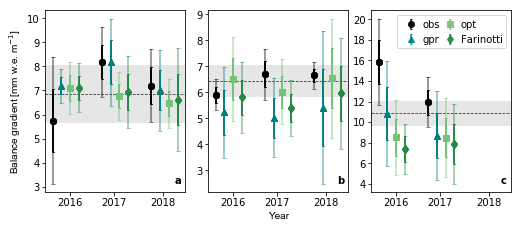

In [179]:
# figure comparing S07 and ASTER 2000-2009
font = {'family':'Arial',
        'size'   : 10}

pylab.rcParams['xtick.major.pad']='2'
pylab.rcParams['ytick.major.pad']='2'

av_grad = [6.84, 6.44, 10.84] 
std_grad = [0.6, 0.3, 0.6]
sym = ['o', '^', 's', 'd']
color = ['k', 'teal', '#74c476', '#238b45']
method = ['obs', 'gpr','opt', 'farin']
Method = ['obs', 'gpr','opt', 'Farinotti']

years = [2016, 2017, 2018]
fig, axarr = plt.subplots(1,3, sharex=True, figsize=(7.08,3.0)) #sharey=True
txt= ['a', 'b', 'c']
k=0
for i in range(3):
    path = '/home/pelto/Desktop/ice_flux/' + gl[i] +'/'
    data = pd.read_csv(path + 'slopes.csv')
    pos = [0.,1.,2.]
    
    for n in range(data.method.nunique()):
        for i in range(len(pos)):
            
    #         x_pos=(pos[i]+pos[i]*0.1)

            use=data[data.method==method[n]]
            if i==0:
                axarr[k].errorbar(pos,np.asarray(use.slope/1.), xerr=None, yerr=use.stdE/1., fmt=sym[n], c=color[n],
                    label=Method[n], alpha=0.9, capsize=1)
            else:
                axarr[k].errorbar(pos,np.asarray(use.slope/1.), xerr=None, yerr=use.stdE/1., fmt=sym[n], c=color[n],
                    alpha=0.9, capsize=1)
                
            if i==0:
                axarr[k].errorbar(pos,np.asarray(use.slope/1.), xerr=None, yerr=use.stdE*2./1., fmt=sym[n], c=color[n],
                    alpha=0.2, capsize=2)
            else:
                axarr[k].errorbar(pos,np.asarray(use.slope/1.), xerr=None, yerr=use.stdE*2./1., fmt=sym[n], c=color[n],
                    alpha=0.2, capsize=2)

        pos=np.array(pos)+0.18


    # for g in range(data.method.nunique()):
    #     axarr[j,k].errorbar(pos,use.slope, xerr=None, yerr=use.stdE, fmt=sym[g], c=color[g],
    #                 label=method[g], alpha=0.9, capsize=5)  


    ## add line for average SMB grad

    H = axarr[k].axhline(av_grad[k]/1, c='k', alpha=0.8, zorder=1, linewidth=0.75, ls='--')
    # axarr[j,k].axhline(av_grad[num]/1, c='0.8', alpha=0.8, zorder=0, linewidth=66.67*std_grad[num])
    rectangle = plt.Rectangle((-0.2,((av_grad[k]-std_grad[k]*2)/1)),3.0,std_grad[k]*4/1, zorder=0, fc='0.9')
    # rectangle = plt.Rectangle((0.0,0.009),2.25,0.01)
    axarr[k].add_patch(rectangle) #plt.gca().add_patch(rectangle)
    # plt.fill_between(H, y1=((av_grad[num]+std_grad[num])/1), y2=((av_grad[num]-std_grad[num])/1))

    axarr[2].legend(loc='best', ncol=2, handletextpad=0.1, columnspacing=0)#, prop=font)
    # axarr[j,k].legend([sym], [method], loc='upper left', ncol=3, handletextpad=0.1, columnspacing=0)#, prop=font) 
    # plt.xticks(np.arange(0,6)*4+2,(S07['glacier']), **font, rotation=45)

    axarr[k].text(0.92, 0.05, txt[k], transform=axarr[k].transAxes, fontweight='bold', fontsize=10)
    axarr[0].set_ylabel('Balance gradient [mm w.e. m$^{-1}$]', **font) #[kg m$^{-2}$ yr$^{-1}$]')
    axarr[1].set_xlabel('Year', **font)
        
    if k == 2:
        axarr[k].yaxis.set_major_locator(ticker.MultipleLocator(2.))
    else:
        axarr[k].yaxis.set_major_locator(ticker.MultipleLocator(1.))
    
    # plt.ylim([-2, 1])
    
    # plt.yticks(np.arange(0.006,0.018,0.001))

    k+=1
plt.xlim(-0.15,2.7)
plt.xticks([0.35,1.25,2.25], ['2016', '2017', '2018'])
plt.tight_layout(pad=0.1)
plt.savefig(products + 'all_slopes_errorbar_'+ '2sigma.pdf',dpi=300)

print('All done!')

In [144]:
k

3

In [145]:
axarr[0]